# <span style="color:darkblue"> Lecture 11: Application 1 - Linear Regression </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries </span>


In [1]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<font size = "5">

Install the "statsmodels" library
- Run "pip3 install statsmodels" in the terminal
- Automatically included in Anaconda

In [2]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf


# <span style="color:darkblue"> II. Generate simulated Data </span>

<font size = "5">

Create an empty dataset

In [3]:
dataset = pd.DataFrame([])

<font size = "5">

Create two random variables of size ($n = 50$)

In [4]:
n = 50
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)


<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [9]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]
print(dataset["y"])

0     4.303071
1     2.094968
2     1.922976
3    -1.231682
4     1.528936
5     4.609161
6     2.460723
7     2.634382
8     3.099666
9    -1.492497
10    3.521366
11    2.518598
12    3.264548
13   -1.055965
14    1.483283
15    0.923047
16   -2.092847
17   -2.067888
18   -1.980323
19    0.898812
20    1.702064
21    0.551746
22    1.079141
23    2.353611
24    5.006755
25    1.706549
26    3.966908
27   -2.302763
28    1.358809
29    0.804973
30    1.636109
31   -1.176930
32   -0.910384
33    2.064639
34   -0.698965
35   -2.970078
36   -1.781021
37    1.260342
38   -0.454935
39   -0.901833
40    4.424648
41   -1.782122
42    2.798257
43    3.240019
44    4.446299
45   -2.052359
46    3.347036
47    3.043641
48   -1.922269
49   -0.658037
Name: y, dtype: float64


<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [6]:
dataset["p"] = b0 + b1*dataset["x"]

<font size = "5">

Plot the data

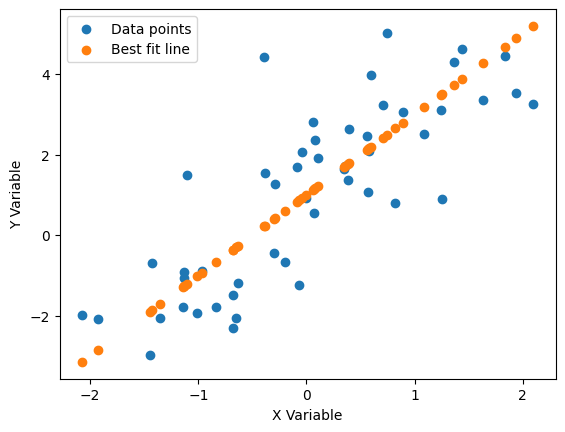

In [10]:
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.scatter(x = dataset["x"], y = dataset["p"])

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()


<font size = "5" >

Try it yourself

- Create a new dataset called $\quad$```subset_above2``` 
- This subsets records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations


In [17]:
# Write your own code here
subset_above2 = pd.DataFrame([])
subset_above2 = dataset.query("y >= 2")
print(len(dataset))
print(len(subset_above2))
prop = 1/(len(dataset) / len(subset_above2))
print(prop)




50
19
0.37999999999999995


<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@xbar```,$\text{ }$ ```@stdv_sample```

In [18]:
# Note: abs(...) is the absolute value function
# Write your own code 
ybar = dataset["y"].mean()
stdv_sample = dataset["y"].std()
holder = dataset.query("abs(y - @ybar) <= @stdv_sample")
print(holder)




           x         e         y         p
1   0.575381 -0.055795  2.094968  2.150762
2   0.109408  0.704161  1.922976  1.218816
4  -0.382108  1.293151  1.528936  0.235785
6   0.555384  0.349955  2.460723  2.110768
7   0.393766  0.846850  2.634382  1.787532
8   1.241167 -0.382669  3.099666  3.482335
11  1.084287 -0.649977  2.518598  3.168575
12  2.095432 -1.926315  3.264548  5.190863
13 -1.135858  0.215750 -1.055965 -1.271716
14 -1.104183  2.691650  1.483283 -1.208366
15 -0.002258 -0.072436  0.923047  0.995483
19  1.254344 -2.609875  0.898812  3.508688
20 -0.091298  0.884660  1.702064  0.817403
21  0.069906 -0.588065  0.551746  1.139811
22  0.566910 -1.054679  1.079141  2.133819
23  0.082929  1.187754  2.353611  1.165857
25  0.359706 -0.012862  1.706549  1.719411
28  0.385440 -0.412071  1.358809  1.770880
29  0.822957 -1.840942  0.804973  2.645915
30  0.342651 -0.049194  1.636109  1.685302
31 -0.631637 -0.913656 -1.176930 -0.263275
32 -1.128376  0.346368 -0.910384 -1.256752
33 -0.04179

# <span style="color:darkblue"> II. Estimate the best fit line</span>


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1)$

<font size = "5">

Let's fit an OLS model

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [19]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf"
#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"
#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#

model   = smf.ols(formula = 'y ~  x',data = dataset)
results = model.fit(cov_type = "HC1")

# Can also run as one line
# results = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")


<font size = "5">

Compute the estimated best fit line

In [20]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = results.params
print(b_list)

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    1.009198
x            1.767387
dtype: float64


<font size = "5">

Plot the best fit line

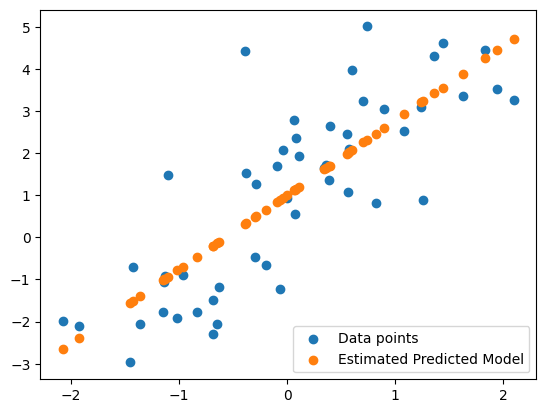

In [21]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

plt.scatter(x = dataset["x"],y = dataset["y"])
plt.scatter(x = dataset["x"],y = dataset["p_estimated"])

plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping scatterplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

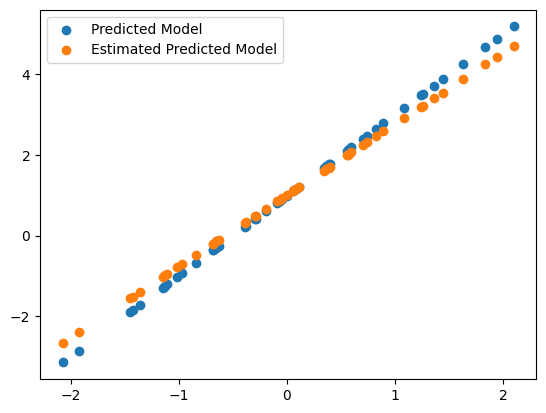

In [23]:
# Write your own code

plt.scatter(x = dataset["x"],y = dataset["p"])
plt.scatter(x = dataset["x"],y = dataset["p_estimated"])

plt.legend(labels = ["Predicted Model","Estimated Predicted Model"])
plt.show()



<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error  error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



In [36]:
# Write your own code
sample_error = dataset["y"]-dataset["p_estimated"]
fn_positive_error = lambda error : error >=0
print(sample_error.head(11))
isabove = fn_positive_error(sample_error)
print(isabove.head(11))

sample_error.apply(fn_positive_error)





0     0.885871
1     0.068848
2     0.720412
3    -2.122886
4     1.195069
5     1.056954
6     0.469946
7     0.929246
8    -0.103156
9    -1.295289
10   -0.917975
dtype: float64
0      True
1      True
2      True
3     False
4      True
5      True
6      True
7      True
8     False
9     False
10    False
dtype: bool


0      True
1      True
2      True
3     False
4      True
5      True
6      True
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14     True
15    False
16     True
17    False
18     True
19    False
20     True
21    False
22    False
23     True
24     True
25     True
26     True
27    False
28    False
29    False
30     True
31    False
32     True
33     True
34     True
35    False
36    False
37     True
38    False
39    False
40     True
41    False
42     True
43     True
44     True
45    False
46    False
47     True
48    False
49    False
dtype: bool

<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

In [40]:
# Write your own code
dataset["error_sqr"] = dataset["sample_error"] ** 2
dataset["sample_error"].mean()








KeyError: 'sample_error'